
    
### Life - Cycle of Data Science Project :
        a) Data Collection
        b) Data Cleaning / Data Preparation / Data Pre-processing / Data Wrangling
        c) Data visuaslisation(EDA)
        d) Perform feature engineering
            I)  feature encoding
            II) checking outliers & impute it..
            III)feature selection or feature importance
            IV) feature scaling/transformation/normalization
            V) dimension reduction
        e) Build machine leaning model & dump it..
        f) Automate ML Pipeline 
        g) Hypertune ml model..along with cross validation

    

## 1.  Read data

In [1]:
## import necessary packages !
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing dataset
    Since data is in form of excel file we have to use pandas read_excel to load the data


In [2]:
train_data = pd.read_excel(r"/Users/yingxinjia/Coding/Portfolio Projects/Air_Fare_prediction/Flight_Price_resources/Data_Train.xlsx")

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


## 2. Deal with missing values

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB



### 10 features belong to object data-type , ie.. in context to Python , they belong to string data-type

            
### 1 feature belong to int64
#### Variations of int are : ('int64','int32','int16') in numpy library..



Int16 is a 16 bit signed integer , it means it can store both positive & negative values
int16 has has a range of  (2^15 − 1) to -2^15 
int16 has a length of 16 bits (2 bytes).. ie Int16 uses 16 bits to store data


Int32 is a 32 bit signed integer , it means it storesboth positive & negative values
int32 has has a range of (2³¹ − 1) to  -2^31
int32 has a length of 32 bits (4 bytes),, ie Int32 uses 32 bits to store data


Int64 is a 64 bit signed integer , it means it can store both positive & negative values
int64 has has a range of  (2^63 − 1) to -2^63 
int64 has a length of 64 bits (8 bytes) , ie Int64 uses 64 bits to store data
            
The only difference is that int64 has max range of storing numbers , then comes int32 , then 16 , then int8

That means that Int64’s take up twice as much memory-and doing 
operations on them may be a lot slower in some machine architectures.

However, Int64’s can represent numbers much more accurately than 
32 bit floats.They also allow much larger numbers to be stored..







The memory usage of a DataFrame (including the index) is shown when calling the info(). 
A configuration option, display.memory_usage (see the list of options), specifies if the DataFrame’s memory usage 
 will be displayed when invoking the df.info() method..
 
memory usage: 918.2+ KB 
The + symbol indicates that the true memory usage could be higher, 
because pandas does not count the memory used by values in columns with dtype=object


Passing memory_usage='deep' will enable a more accurate memory usage report .


In [6]:
# After loading it is important to check null/missing values in a column or a row
# Missing value :  values which occur when no data is recorded for an observation..

train_data.isnull().sum()

#train_data.isnull().sum(axis=0)
#by-default axis is 0 , ie it computes total missing values column-wise !

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [8]:
#getting all the rows where we have missing value

train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


#### as we have 1 missing value , I can directly drop these

In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
# In order to have more accurate memory usage, leverage memory_usage="deep" in info()
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


## 3. Perform data cleaning & extract derived attributes from "Date_of_Journey"
        lets extract derived attributes from "Date_of_Journey" & fetch day , month , year !

In [13]:
data = train_data.copy()

In [14]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### From description we can see that Date_of_Journey is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction, because our model will not be able to understand these string values. It just understand Time-stamp.
For this we require pandas to_datetime to convert object data type to datetime dtype.


In date-time , we have 4 data-types in Pandas :
    datetime64[ns] or datetime64[ns, tz]  or datetime64[ns, UTC] or dtype('<M8[ns]')
     means ‘big-endian’  , < is little-endian
     
     
Imagine , data represented a single unsigned 4-byte little-endian integer, the dtype string would be <u4..
     (u is type-character code for unsigned integer)
     
where ,   UTC = Coordinated Universal Time
          ns  = nano second
          tz  = time zone
          M =  M is a character of Data-time , just like int we have i for "Integer" ,


datetime64[ns] is a general dtype, while <M8[ns] is a specific dtype , ns is basicaly nano second..
Both are similar , it entirely how your numpy was compiled..

np.dtype('datetime64[ns]') == np.dtype('<M8[ns]') This will return True.




In [16]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [17]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

In [18]:
for feature in ['Dep_Time', 'Arrival_Time' , 'Date_of_Journey']:
    change_into_Datetime(feature)

In [19]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [20]:
data["Journey_day"] = data['Date_of_Journey'].dt.day

In [21]:
data["Journey_month"] = data['Date_of_Journey'].dt.month

In [22]:
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [23]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-10-06 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-10-06 05:50:00,2024-10-06 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-10-06 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2024-10-06 18:05:00,2024-10-06 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2024-10-06 16:50:00,2024-10-06 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


## 4. More data cleaning on Dep_Time & Arrival_Time & then extract derived attributes

In [24]:
def extract_hour_min(df , col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute

In [25]:
# Departure time is when a plane leaves the gate. 
extract_hour_min(data , "Dep_Time")

In [26]:
extract_hour_min(data , "Arrival_Time")

In [27]:
## we have extracted derived attributes from ['Arrival_Time' , "Dep_Time"] , so lets drop both these features ..
cols_to_drop = ['Arrival_Time' , "Dep_Time"]

data.drop(cols_to_drop , axis=1 , inplace=True)

In [28]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [29]:
data.shape

(10682, 16)

## 5. Analyze when most of the flights take-off

In [30]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [31]:
#### Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.

def flight_dep_time(x):
    '''
    This function takes the flight Departure time 
    and convert into appropriate format.
    
    '''
    
    if (x>4) and (x<=8):
        return "Early Morning"
    
    elif (x>8) and (x<=12):
        return "Morning"
    
    elif (x>12) and (x<=16):
        return "Noon"
    
    elif (x>16) and (x<=20):
        return "Evening"
    
    elif (x>20) and (x<=24):
        return "Night"
    
    else:
        return "late night"

<Axes: >

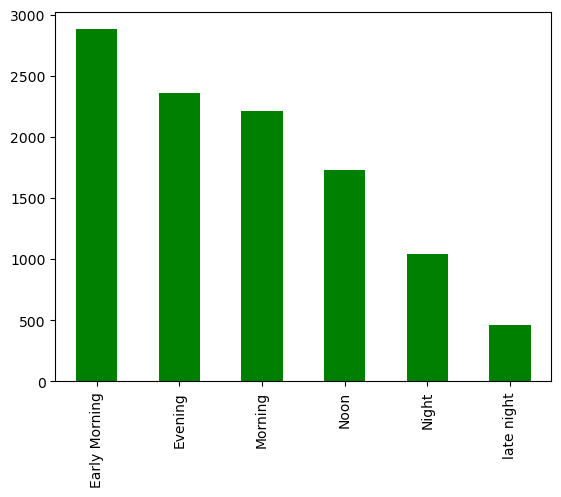

In [32]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar" , color="g")

In [33]:
!pip install plotly
!pip install chart_studio
!pip install cufflinks

In [34]:
## how to use Plotly interactive plots directly with Pandas dataframes

import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot , iplot , init_notebook_mode , download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

## plot is a command of Matplotlib which is more old-school. It creates static charts
## iplot is an interactive plot. Plotly takes Python code and makes beautiful looking JavaScript plots.


In [35]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind="bar")

## 6. Data Preprocessing on Duration feature & extract Duration_hours and Duration_mins

In [36]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [37]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'
        
    return x

In [38]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [39]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [40]:
data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [41]:
data['Duration_mins'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [42]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [43]:
# Another way to get Duration_hours and Duration_mins
#data["Duration_hour"] = pd.to_timedelta(data["Duration"]).dt.components.hours
#data["Duration_minute"] = pd.to_timedelta(data["Duration"]).dt.components.minutes

## 7. Analyze whether duration impacts price or not

In [44]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [45]:
data['Duration_total_mins'] = data['Duration'].str.replace('h' ,"*60").str.replace(' ' , '+').str.replace('m' , "*1").apply(eval)

In [46]:
#data["Duration_in_minute"] = data["Duration_hour"]*60 + data["Duration_minute"]

In [47]:
data['Duration_total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

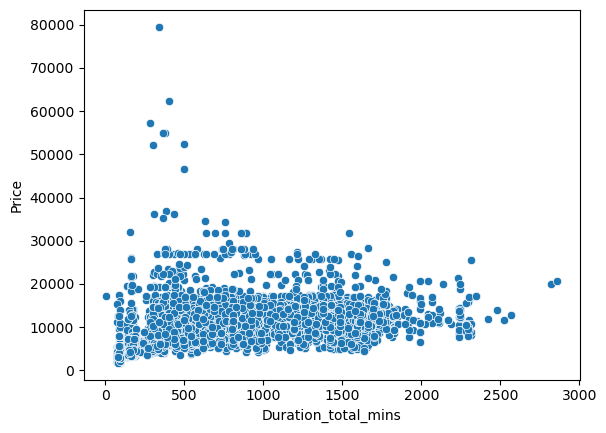

In [48]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , data=data)

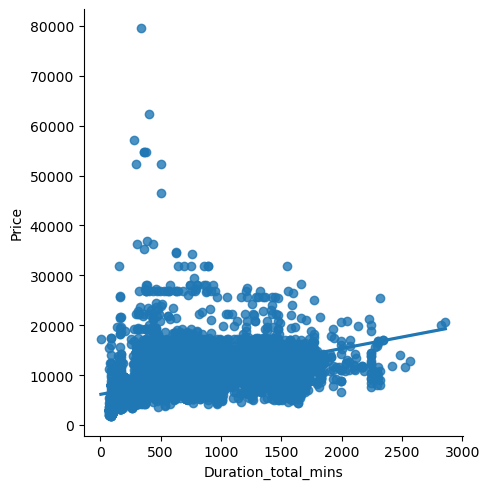

In [49]:
sns.lmplot(x="Duration_total_mins" , y="Price" , data=data)

### As the duration of minutes increases Flight price also increases.

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

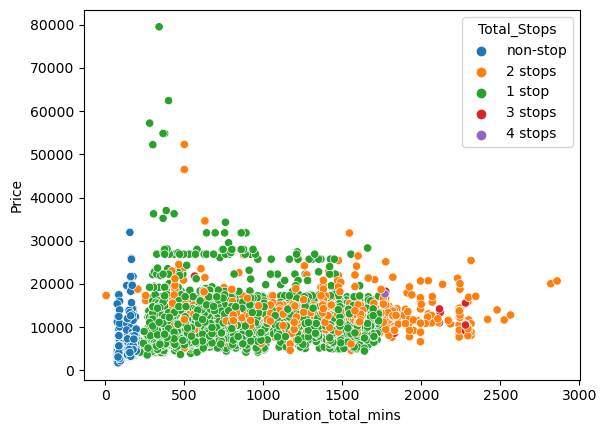

In [50]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , hue="Total_Stops", data=data) #hue parameter is very important


#### It shows non-stop flights take less duration while their fare is also low.
#### As the number of stop increases, duration also increases and price also increases (in most of the cases).


## 8. EDA
#### a. On which routes Jet Airways is extremely used?

In [51]:
data['Airline']=='Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [52]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

#### a. Perform Airline vs Price Analysis.
        ie find price distribution & 5-point summary of each Airline..

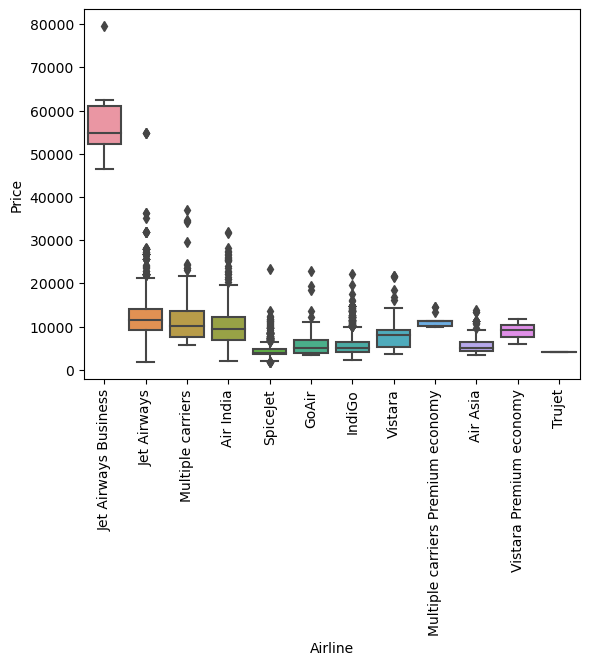

In [53]:
sns.boxplot(y='Price' , x='Airline' , data=data.sort_values('Price' , ascending=False))
plt.xticks(rotation="vertical")
plt.show()

Conclusion--> From graph we can see that Jet Airways Business have the highest Price., 
              Apart from the first Airline almost all are having similar median

## 9. Apply one-hot Encoding on data["Source"]

In [54]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45,285


Categorical data refers to a data type that can be stored into groups/categories/labels 
Examples of categorical variables are  age group, educational level,blood type etc.. 


Numerical data refers to the data that is in the form of numbers, 
Examples of numerical data are height, weight, age etc.. 

Numerical data has two categories: discrete data and continuous data


Discrete data : It basically takes countable numbers like 1, 2, 3, 4, 5, and so on. 
                In case of infinity, these numbers will keep going on...
                age of a fly : 8 , 9 day etc..
                
Continuous data : which is continuous in nature 
                  amount of sugar , 11.2 kg  , temp of a city  , your bank balance !
                  
For example, salary levels and performance classifications are discrete variables, 
whereas height and weight are continuous variables.

In [55]:
cat_col = [col for col in data.columns if data[col].dtype=="object"]

In [56]:
num_col = [col for col in data.columns if data[col].dtype!="object"]

#### Handling Categorical Data
    We are using 2 basic Encoding Techniques to convert Categorical data into some numerical format
    Nominal data --> data are not in any order --> OneHotEncoder is used in this case
    Ordinal data --> data are in order -->       LabelEncoder is used in this case

In [57]:
### Applying One-hot from scratch :

In [58]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [59]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x : 1 if x==sub_category else 0)

In [60]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,...,23,30,5,25,325,0,1,0,0,0
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,...,21,35,4,45,285,1,0,0,0,0


## 10. Perform target guided encoding on Data["Airlines"] and Data["Destination"]
    ofcourse we can use One-hot , but if we have more sub-categories , it creates curse of dimensionality
    lets use Target Guided Mean Encoding in such case to get rid of curse of dimensionality.


#### Now on 2 features , Airline & Destination , we can apply one-hot as there is no such order, but total_stops is ordinal data , it makes no sense if we apply one-hot on top of this.

similarly if we have any feature which have more categories , it is not good to apply one-hot as it will create 
curse of dimensionality issue , which leads to usage of more resources of your pc..

So we can think for appplying mean Encoding or better techniques like Target Guided Ordinal Encoding ! 


In [61]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [62]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [63]:
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}

In [64]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [65]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [66]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [67]:
### now lets perform Target Guided Mean encoding on 'Destination' ..

In [68]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [69]:
data['Destination'].replace('New Delhi' , 'Delhi' , inplace=True)

In [70]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [71]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [72]:
dict_dest = {key:index for index , key in enumerate(dest , 0)}

In [73]:
data['Destination'] = data['Destination'].map(dict_dest)

In [74]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [75]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-12-05,Kolkata,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,...,23,30,5,25,325,0,1,0,0,0
4,3,2019-01-03,Banglore,2,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,...,21,35,4,45,285,1,0,0,0,0


## 11. Perform Label (Manual) Encoding on Data["Total_Stops"]

In [76]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

#### As this is a case of ordinal categorical type, we perform label encoding from scratch.
#### Here Values are assigned with corresponding key

In [77]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [78]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

### Remove Un-necessary features 

In [79]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-12-05,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,5,...,23,30,5,25,325,0,1,0,0,0
4,3,2019-01-03,Banglore,2,BLR → NAG → DEL,4h 45m,1,No info,13302,3,...,21,35,4,45,285,1,0,0,0,0


In [80]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [81]:
data['Additional_Info'].value_counts()/len(data)*100

# Additional_Info contains almost 80% no_info,so we can drop this column

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: Additional_Info, dtype: float64

In [82]:
data['Journey_year'].unique()

array([2019])

In [83]:
data.drop(columns=['Date_of_Journey' , 'Route', 'Duration', 'Additional_Info' , 'Journey_year', 'Duration_total_mins' , 'Source'] , axis=1 , inplace=True)

In [84]:
data.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'Journey_day',
       'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [85]:
data.head()

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


## 12. Perform outlier detection

#### Here the list of data visualization plots to spot the outliers.
    1. Box and whisker plot (box plot).
    2. Scatter plot.
    3. Histogram.
    4. Distribution Plot.


In [86]:
def plot(df, col):
    fig , (ax1 , ax2 , ax3) = plt.subplots(3,1)
    
    sns.distplot(df[col] , ax=ax1)
    sns.boxplot(df[col] , ax=ax2, orient='h')
    sns.distplot(df[col] , ax=ax3 , kde=False)

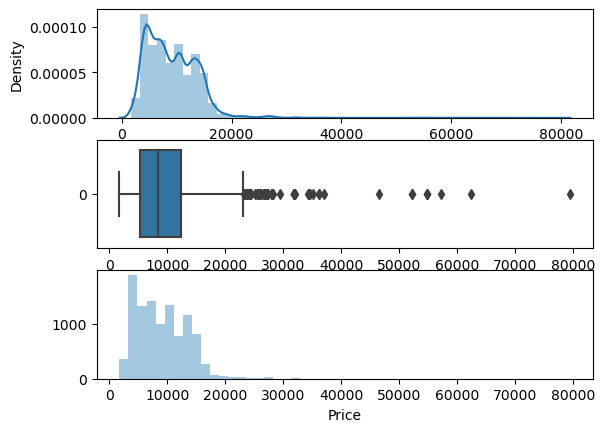

In [87]:
plot(data , 'Price')

        If Features Are Skewed We Use the below Technique which is IQR
        Data which are greater than Q3 +1.5 IQR and data which are below than Q1 - 1.5 IQR are my outliers,
        where ,  IQR = 75th%ile data - 25th%ile data
          


In [88]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [89]:
print(maximum)

23017.0


In [90]:
print(minimum)

-5367.0


In [91]:
print([price for price in data['Price'] if price> maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [92]:
len([price for price in data['Price'] if price> maximum or price<minimum])

94

### How to deal with Outlier

In [93]:
### wherever I have price >35K just replace it with median of Price

data['Price'] = np.where(data['Price']>=35000 , data['Price'].median() , data['Price'])

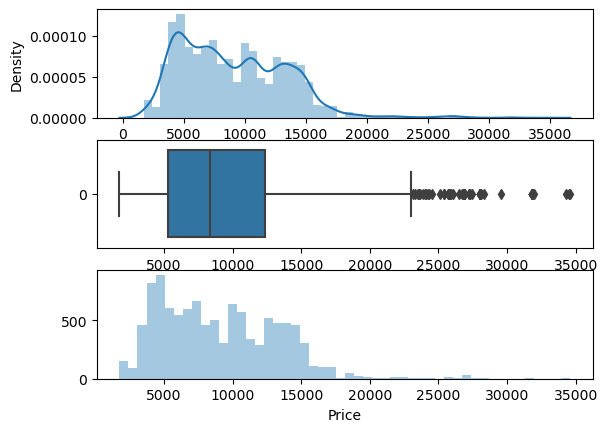

In [94]:
plot(data , 'Price')

In [95]:
print([price for price in data['Price'] if price >= maximum])

[27430.0, 26890.0, 26890.0, 25139.0, 27210.0, 26743.0, 26890.0, 25735.0, 27992.0, 26890.0, 26890.0, 23583.0, 26890.0, 23533.0, 24115.0, 25735.0, 31783.0, 27992.0, 26890.0, 26890.0, 25430.0, 27210.0, 26890.0, 25735.0, 26890.0, 28097.0, 27992.0, 26890.0, 25735.0, 26092.0, 31825.0, 25913.0, 25735.0, 27992.0, 31825.0, 23267.0, 31825.0, 25430.0, 26890.0, 23843.0, 26890.0, 25735.0, 28322.0, 25735.0, 25735.0, 31825.0, 26890.0, 27992.0, 34273.0, 29528.0, 26890.0, 26890.0, 26890.0, 34503.0, 26890.0, 27992.0, 26890.0, 26890.0, 23170.0, 24528.0, 26890.0, 27992.0, 25735.0, 34608.0, 25703.0, 26890.0, 23528.0, 31825.0, 27282.0, 25735.0, 27992.0, 24017.0, 31945.0, 26890.0, 24318.0, 23677.0, 27992.0, 24210.0, 26890.0, 31825.0, 26480.0]


In [96]:
len([price for price in data['Price'] if price >= maximum])

81

In [97]:
q3 + 3*iqr

33661.0

## 13. Perform feature selection

#### Feature Selection
    Finding out the best feature which will contribute and have good relation with target variable. 
    Why to apply Feature Selection?
    To select important features ie to get rid of curse of dimensionality ie.or to get rid of duplicate features

In [98]:
X = data.drop(['Price'] , axis=1)

In [99]:
y = data['Price']

In [100]:
from sklearn.feature_selection import mutual_info_regression

In [101]:
imp = mutual_info_regression(X , y)

#### Estimate mutual information for a continuous target variable.

Mutual information between two random variables is a non-negative
value, which measures the dependency between the variables. 
If It is equal to zero it means two random variables are independent, and higher
values mean higher dependency.


In [102]:
imp_df = pd.DataFrame(imp , index=X.columns)

In [103]:
imp_df.columns = ['importance']

In [104]:
imp_df.sort_values(by='importance' , ascending=False)

,importance
Destination,1.001986
Airline,0.968099
Total_Stops,0.799531
Source_Delhi,0.529900
Duration_hours,0.472793
Source_Kolkata,0.459326
Arrival_Time_hour,0.399577
Source_Banglore,0.390257
Arrival_Time_minute,0.350584
Duration_mins,0.346778


## 14. Build ML model

#### split dataset into train & test

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
rf_model = RandomForestRegressor()

In [109]:
rf_model.fit(X_train , y_train)

RandomForestRegressor()

In [110]:
y_pred = rf_model.predict(X_test)

In [111]:
y_pred

array([16793.03,  6406.13,  8848.96, ...,  3526.3 ,  6381.59,  7172.54])

In [112]:
from sklearn import metrics

In [113]:
metrics.r2_score(y_test , y_pred)

0.8071934359668314

### How to save the model

#### lets try to dump ml model using pickle or joblib..
    advantage of dumping--
    imagine in future we have new data & lets say we have to predict price on this huge data

    then to do prediction on this new data , we can use this pre-trained model what we have dumped..


In [114]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [115]:
import pickle

In [116]:
# open a file, where you want to store the data
file = open(r"/Users/yingxinjia/Coding/Portfolio Projects/Air_Fare_prediction/Flight_Price_resources/rf_random.pkl" , 'wb')

In [117]:
# dump information to that file
pickle.dump(rf_model , file)

In [118]:
model = open(r"/Users/yingxinjia/Coding/Portfolio Projects/Air_Fare_prediction/Flight_Price_resources/rf_random.pkl", 'rb')

In [119]:
forest = pickle.load(model)

In [120]:
y_pred2 = forest.predict(X_test)

In [121]:
metrics.r2_score(y_test , y_pred2)

0.8071934359668314

## 15. Define my own evaluation metric (MAPE) and automate ML pipeline

### a. make our own metric...

In [122]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [123]:
mape(y_test , y_pred)

13.27675573987563

### b. automate ml pipeline !


    Lets automate all the stuffs..
    let say ,I will just pass ml algo & i get several results like--
    
    Training score, predictions, r2_score, mse, mae, rmse, mape,distribution of error

In [124]:
from sklearn import metrics

In [125]:
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))
    y_predection = model.predict(X_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    print('r2 score : {}'.format(metrics.r2_score(y_test , y_predection)))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_predection))))
    print('MAPE : {}'.format(mape(y_test , y_predection)))
    sns.distplot(y_test - y_predection)

Training score : 0.9513683479421636
predictions are : [16759.08  6441.2   8800.85 ...  3620.99  6403.55  6889.06]


r2 score : 0.8072375182579408
MAE : 1184.9427220026116
MSE : 3752622.825069196
RMSE : 1937.1687652523194
MAPE : 13.253867920093779


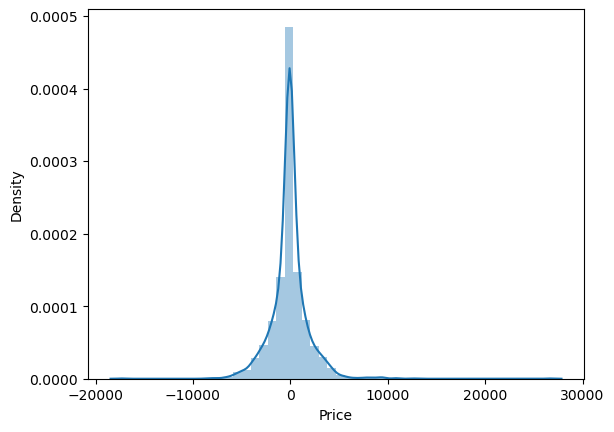

In [126]:
predict(RandomForestRegressor())

In [127]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.966591628243878
predictions are : [16840.  6976.  8610. ...  3419.  5797.  6818.]


r2 score : 0.6952104671102788
MAE : 1374.0706976163735
MSE : 5933520.608510545
RMSE : 2435.8818954355206
MAPE : 15.263531351903465


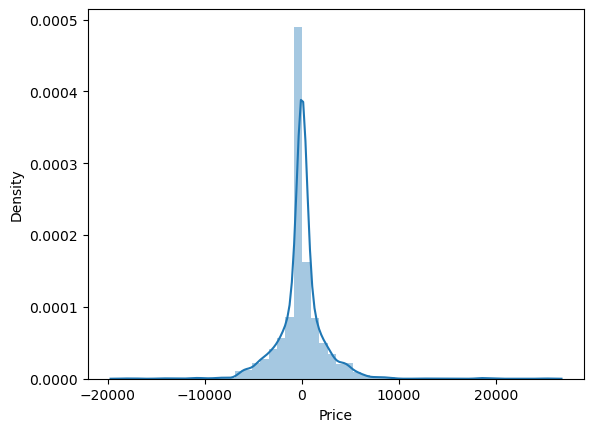

In [128]:
predict(DecisionTreeRegressor())

## 16.. how to hypertune ml model

In [129]:
## how to select which ML algo we should apply for
## ans is use Multiple Algos,then go for Hyper-parameter Optimization,then for Cross Validation then go for various metrics 
## & based on domain expertise knowledge Then I can say ya this model perfoms best !

### Hypertuning or Hyperparameter Optimization
    1.Choose following method for hyperparameter tuning
        a.RandomizedSearchCV --> Fast way to Hypertune model
        b.GridSearchCV--> Slower way to hypertune my model
    2.Choose ML algo that u have to hypertune
    2.Assign hyperparameters in form of dictionary or create hyper-parameter space
    3.Define and apply searching on training data or fit the CV model 
    4.Check best parameters and best score

In [130]:
from sklearn.model_selection import RandomizedSearchCV

In [131]:
### initialise your estimator
reg_rf = RandomForestRegressor()

In [132]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]


In [133]:
# Create the random grid or hyper-parameter space
random_grid = {
    'n_estimators' : n_estimators , 
    'max_features' : max_features , 
    'max_depth' : max_depth , 
    'min_samples_split' : min_samples_split
}

In [134]:
# Define searching

# Random search of parameters, using 3 fold cross validation
# If using GridSearchSV, the search across 576 different combinations (6*2*4*4*3)
rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions=random_grid , cv=3 , n_jobs=-1 , verbose=2)

In [141]:
rf_random.fit(X_train , y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/yingxinjia/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yingxinjia/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yingxinjia/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it i

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [142]:
rf_random.best_params_

{'n_estimators': 320,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 13}

In [143]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=13, max_features='auto', min_samples_split=5,
                      n_estimators=320)

In [144]:
rf_random.best_score_

0.8211227947355878

In [145]:
y_pred = rf_random.best_estimator_.predict(X_test)

In [146]:
print('r2 score : {}'.format(metrics.r2_score(y_test , y_pred)))

r2 score : 0.8290794968073949
